This notebooks shows how to load the data form the cluster.

In [893]:
# experimentgpubig4n

In [894]:
pwd

'/Users/pellegrinraphael/Desktop/Harvard/Year_2/ME_thesis/NNCaustics-BranchedFlows/Experiments/Cluster/Non_TL/Non_loop_optimization/Non-S2S/Potential_1_velocity50/Type_I/1_head/experimentgpubig4bis6'

In [55]:
cd /Users/pellegrinraphael/Desktop/Harvard/Year_2/ME_thesis/NNCaustics-BranchedFlows/Experiments/Cluster/Non_TL/Non_loop_optimization/Non-S2S/Scaled_1_1/Type_I/1_head/exp1

/Users/pellegrinraphael/Desktop/Harvard/Year_2/ME_thesis/NNCaustics-BranchedFlows/Experiments/Cluster/Non_TL/Non_loop_optimization/Non-S2S/Scaled_1_1/Type_I/1_head/exp1


In [56]:
ls

Clustergpubig4bis3.py
GPUbig4bis3.sh
Head_0Initial_x_0.0final_t_0.66alpha_1width_64width_heads_32energyconservation_True_normclipping_True_epochs_60000grid_size_4000TrajectoriesNumerical_px.p
Head_0Initial_x_0.0final_t_0.66alpha_1width_64width_heads_32energyconservation_True_normclipping_True_epochs_60000grid_size_4000TrajectoriesNumerical_py.p
Head_0Initial_x_0.0final_t_0.66alpha_1width_64width_heads_32energyconservation_True_normclipping_True_epochs_60000grid_size_4000TrajectoriesNumerical_x.p
Head_0Initial_x_0.0final_t_0.66alpha_1width_64width_heads_32energyconservation_True_normclipping_True_epochs_60000grid_size_4000TrajectoriesNumerical_y.p
Head_0Initial_x_0.0final_t_0.66alpha_1width_64width_heads_32energyconservation_True_normclipping_True_epochs_60000grid_size_4000Trajectory_NN_px.p
Head_0Initial_x_0.0final_t_0.66alpha_1width_64width_heads_32energyconservation_True_normclipping_True_epochs_60000grid_size_4000Trajectory_NN_py.p
Head_0Initial_x_0.0final_t_0.66alpha_1width_64width

In [897]:
import numpy as np
import copy
import pickle
import string
import json

import matplotlib.pyplot as plt

In [57]:
initial_x=0.0
final_t=0.66
alpha_=1
width_=64
width_heads=32
epochs_=60000
grid_size=4000
energy_conservation=True
norm_clipping=True
number_of_heads=1

In [58]:
import torch

In [59]:
filename = 'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+\
  'alpha_'+ str(alpha_)+'width_'+str(width_)+'width_heads_'+str(width_heads)+\
  'energyconservation_'+str(energy_conservation)+\
  '_normclipping_'+str(norm_clipping)+'_'\
  'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'Network_state'+'.p'

#networkstate=pickle.load(open(filename,"rb"))

In [60]:
#networkstate;

In [61]:
filename = 'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+\
  'alpha_'+ str(alpha_)+'width_'+str(width_)+'width_heads_'+str(width_heads)+\
  'energyconservation_'+str(energy_conservation)+\
  '_normclipping_'+str(norm_clipping)+'_'\
  'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'loss'+'.p'

loss=pickle.load(open(filename,"rb"))

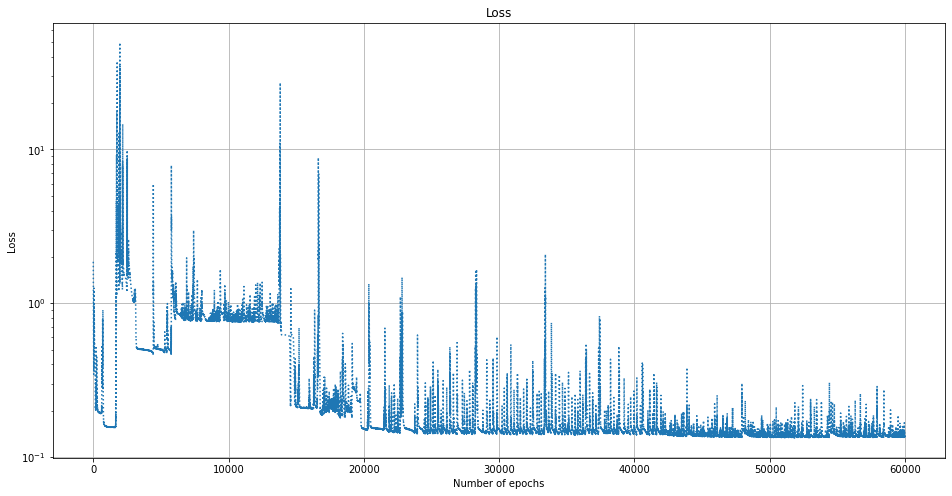

In [62]:
f,ax=plt.subplots(1,1,figsize=(16,8))
ax.grid()
ax.set_title("Loss")
ax.set_xlabel("Number of epochs")
ax.set_ylabel("Loss")
ax.plot(range(len(loss)),loss, ls='dotted')
ax.set_yscale('log')
if number_of_heads>1:
    filename_p = 'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+\
      'alpha_'+ str(alpha_)+'width_'+str(width_)+'width_heads_'+str(width_heads)+\
      'energyconservation_'+str(energy_conservation)+\
      '_normclipping_'+str(norm_clipping)+'_'\
      'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'losses_part'+'.p'
    loss_p=pickle.load(open(filename_p,"rb"))
    for j in range(number_of_heads):
        ax.plot(range(len(loss_p[j])),loss_p[j], alpha=0.2, linestyle='g.')

Text(0, 0.5, '$y$')

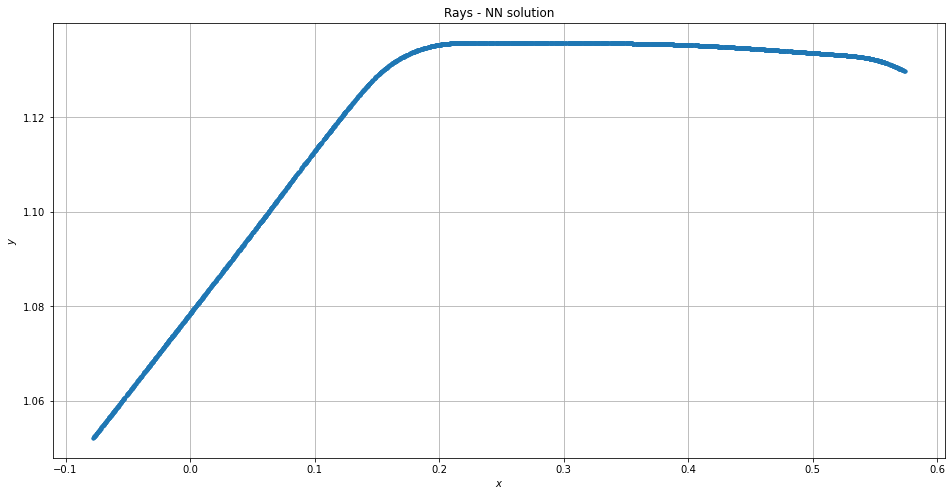

In [63]:
Trajectories_NN_x=dict()
Trajectories_NN_y=dict()
Trajectories_NN_px=dict()
Trajectories_NN_py=dict()

f,ax=plt.subplots(1,1,figsize=(16,8))

for m in range(number_of_heads):
    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+\
        str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+'width_heads_'+str(width_heads)+\
        'energyconservation_'+str(energy_conservation)+\
        '_normclipping_'+str(norm_clipping)+'_'\
        'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+\
        'Trajectory_NN_x'+'.p'
    


    NNx=pickle.load(open(filename,"rb"))
    Trajectories_NN_x[m]=NNx
    

    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+\
        str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+'width_heads_'+str(width_heads)+\
        'energyconservation_'+str(energy_conservation)+\
        '_normclipping_'+str(norm_clipping)+'_'\
        'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+\
        'Trajectory_NN_y'+'.p'

    NNy=pickle.load(open(filename,"rb"))
    Trajectories_NN_y[m]=NNy
    
    ax.plot(NNx,NNy,'.', label="NN solution of SDE stoc for {} head".format(m+1))

    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+\
        str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+'width_heads_'+str(width_heads)+\
        'energyconservation_'+str(energy_conservation)+\
        '_normclipping_'+str(norm_clipping)+'_'\
        'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+\
        'Trajectory_NN_px'+'.p'

    NNpx=pickle.load(open(filename,"rb"))
    Trajectories_NN_px[m]=NNpx

    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+\
        str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+'width_heads_'+str(width_heads)+\
        'energyconservation_'+str(energy_conservation)+\
        '_normclipping_'+str(norm_clipping)+'_'\
        'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'Trajectory_NN_py'+'.p'

    NNpy=pickle.load(open(filename,"rb"))
    Trajectories_NN_py[m]=NNpy
    
# Make a grid, set the title and the labels
ax.grid()
ax.set_title("Rays - NN solution")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [64]:
filename = 'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
  'width_heads_'+str(width_heads)+\
  'energyconservation_'+str(energy_conservation)+\
  '_normclipping_'+str(norm_clipping)+'_'\
  'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'Initial_conditions'+'.p'
Initial_conditions=pickle.load(open(filename,"rb"))

In [65]:
Initial_conditions;

In [66]:
for i in Initial_conditions:
    print("The initial condition is {}".format(Initial_conditions[i]))

The initial condition is 33.66


In [67]:
filename = 'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
  'width_heads_'+str(width_heads)+\
  'energyconservation_'+str(energy_conservation)+\
  '_normclipping_'+str(norm_clipping)+'_'\
  'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'d_comparaison'+'.p'
#Network=pickle.load(open(filename,"rb"))

In [68]:
#Network;

Text(0, 0.5, '$y$')

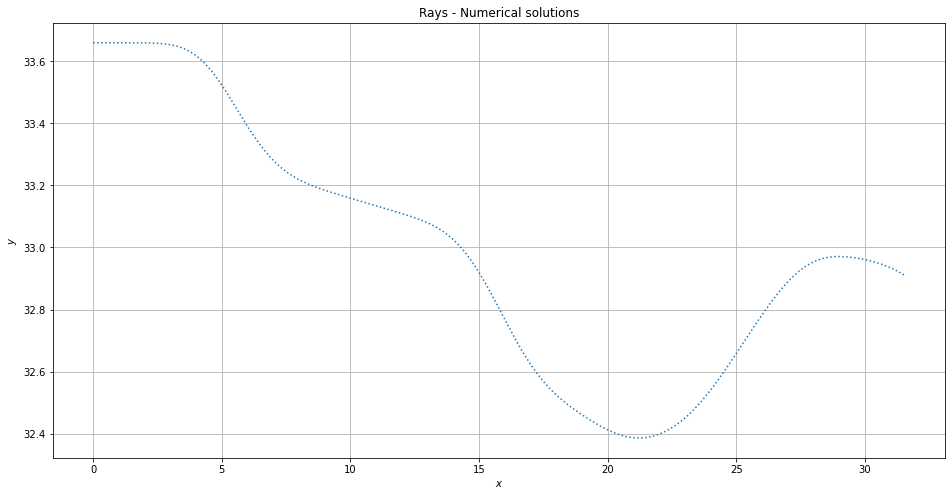

In [69]:
f,ax=plt.subplots(1,1,figsize=(16,8))

for m in range(number_of_heads):    
    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
          'width_heads_'+str(width_heads)+\
          'energyconservation_'+str(energy_conservation)+\
          '_normclipping_'+str(norm_clipping)+'_'\
          'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'TrajectoriesNumerical_x'+'.p'

    Numericalx=pickle.load(open(filename,"rb"))

    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
          'width_heads_'+str(width_heads)+\
          'energyconservation_'+str(energy_conservation)+\
          '_normclipping_'+str(norm_clipping)+'_'\
          'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'TrajectoriesNumerical_y'+'.p'

    Numericaly=pickle.load(open(filename,"rb"))
    
    ax.plot(Numericalx,Numericaly, ls=':', label="NN solution of SDE stoc for {} head".format(m+1))

    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
          'width_heads_'+str(width_heads)+\
          'energyconservation_'+str(energy_conservation)+\
          '_normclipping_'+str(norm_clipping)+'_'\
          'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'TrajectoriesNumerical_px'+'.p'

    Numericalpx=pickle.load(open(filename,"rb"))

    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
          'width_heads_'+str(width_heads)+\
          'energyconservation_'+str(energy_conservation)+\
          '_normclipping_'+str(norm_clipping)+'_'\
          'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'TrajectoriesNumerical_py'+'.p'

    Numericalpy=pickle.load(open(filename,"rb"))
    
# Make a grid, set the title and the labels
ax.grid()
ax.set_title("Rays - Numerical solutions")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [70]:
Numericalx;

In [71]:
Numericaly;

In [72]:
filename = 'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
  'width_heads_'+str(width_heads)+\
  'energyconservation_'+str(energy_conservation)+\
  '_normclipping_'+str(norm_clipping)+'_'\
  'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'Means'+'.p'
Means=pickle.load(open(filename,"rb"))

In [73]:
Means;

In [74]:
filename = 'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
  'width_heads_'+str(width_heads)+\
  'energyconservation_'+str(energy_conservation)+\
  '_normclipping_'+str(norm_clipping)+'_'\
  'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'Grid'+'.p'
Grid=pickle.load(open(filename,"rb"))

In [75]:
Grid;

In [76]:
filename = 'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
  'width_heads_'+str(width_heads)+\
  'energyconservation_'+str(energy_conservation)+\
  '_normclipping_'+str(norm_clipping)+'_'\
  'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'Grid_potential_values'+'.p'
Grid_potential_value=pickle.load(open(filename,"rb"))

In [77]:
filename = 'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
  'width_heads_'+str(width_heads)+\
  'energyconservation_'+str(energy_conservation)+\
  '_normclipping_'+str(norm_clipping)+'_'\
  'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'Grid-x1'+'.p'
Gridx1=pickle.load(open(filename,"rb"))

In [78]:
filename = 'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
  'width_heads_'+str(width_heads)+\
  'energyconservation_'+str(energy_conservation)+\
  '_normclipping_'+str(norm_clipping)+'_'\
  'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'Grid-y1'+'.p'
Gridy1=pickle.load(open(filename,"rb"))

In [79]:
Grid_potential_value

array([[-2.32625380e-10, -3.25147646e-10, -4.52556378e-10, ...,
        -2.68049615e-02, -2.51219382e-02, -2.34541182e-02],
       [-3.05979929e-10, -4.27679813e-10, -5.95268405e-10, ...,
        -3.02288748e-02, -2.83278580e-02, -2.64446107e-02],
       [-4.00418611e-10, -5.59683756e-10, -7.79003112e-10, ...,
        -3.39174345e-02, -3.17810038e-02, -2.96652252e-02],
       ...,
       [-1.74113904e-07, -2.07048605e-07, -2.45637526e-07, ...,
        -4.44004956e-02, -4.76860578e-02, -5.11592213e-02],
       [-2.37356253e-07, -2.81339658e-07, -3.32485135e-07, ...,
        -4.11412744e-02, -4.43487720e-02, -4.77552701e-02],
       [-3.23747054e-07, -3.82927214e-07, -4.51391278e-07, ...,
        -3.81068027e-02, -4.12292729e-02, -4.45596286e-02]])

Text(0, 0.5, '$y$')

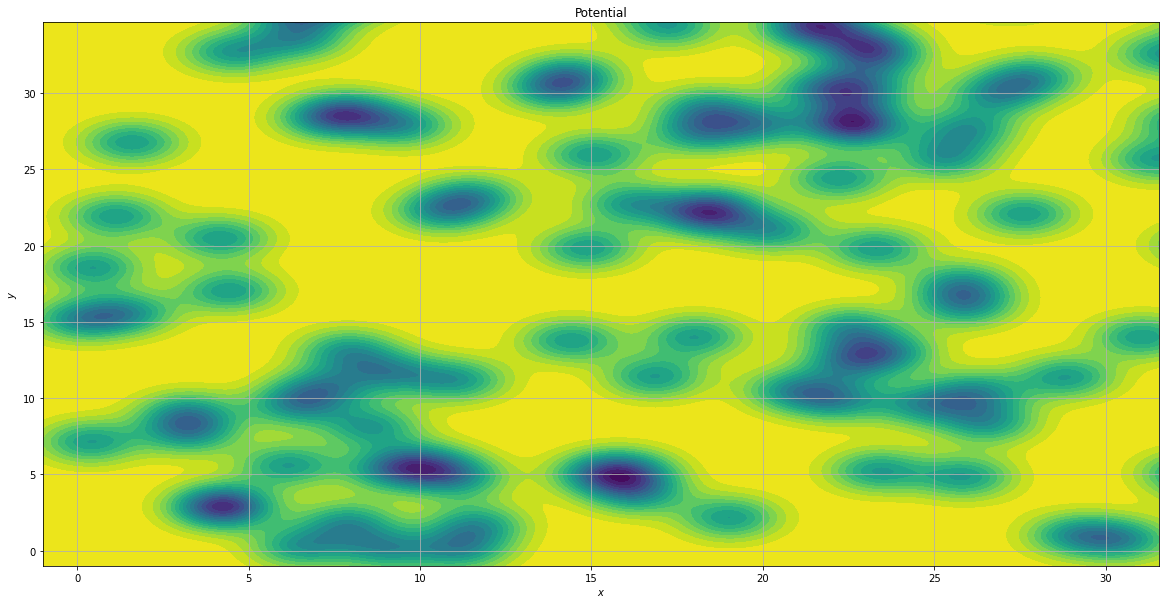

In [80]:
f, ax =plt.subplots(1,1, figsize=(20,10))
ax.contourf(Gridx1,Gridy1,Grid_potential_value,levels=20);
ax.grid()
ax.set_title("Potential")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

Text(0, 0.5, '$y$')

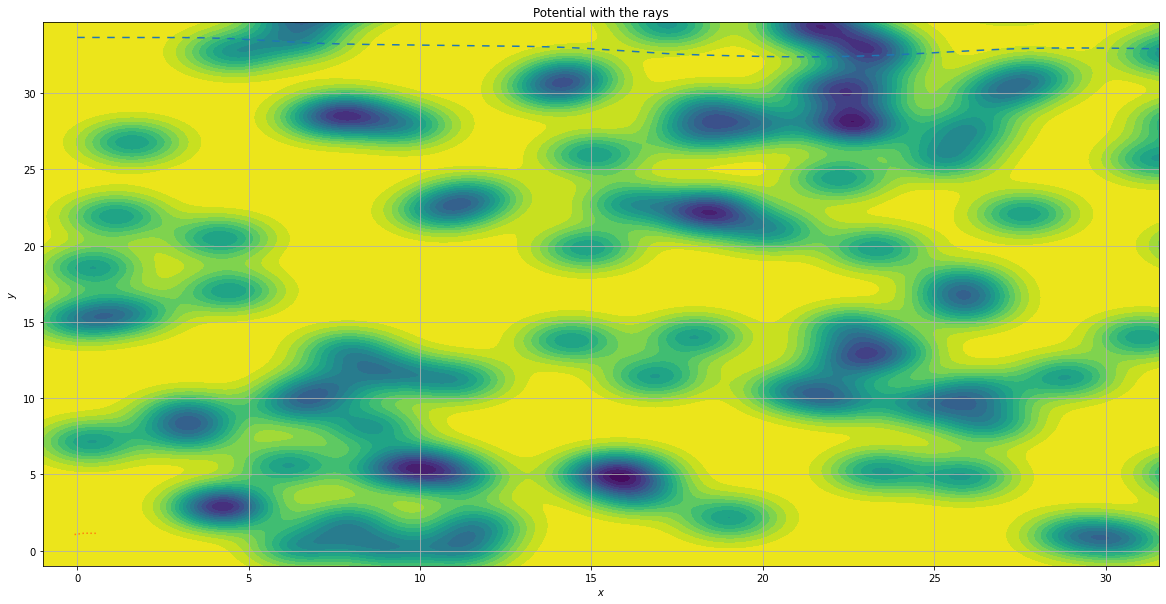

In [81]:
f, ax =plt.subplots(1,1, figsize=(20,10))
ax.contourf(Gridx1,Gridy1,Grid_potential_value,levels=20);
for m in range(number_of_heads):    
    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
          'width_heads_'+str(width_heads)+\
          'energyconservation_'+str(energy_conservation)+\
          '_normclipping_'+str(norm_clipping)+'_'\
          'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'TrajectoriesNumerical_x'+'.p'

    Numericalx=pickle.load(open(filename,"rb"))

    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+\
          'width_heads_'+str(width_heads)+\
          'energyconservation_'+str(energy_conservation)+\
          '_normclipping_'+str(norm_clipping)+'_'\
          'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+'TrajectoriesNumerical_y'+'.p'

    Numericaly=pickle.load(open(filename,"rb"))
    
    ax.plot(Numericalx,Numericaly, ls=(0,(5,5)), label="NN solution of SDE stoc for {} head".format(m+1))
    
for m in range(number_of_heads):
    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+\
        str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+'width_heads_'+str(width_heads)+\
        'energyconservation_'+str(energy_conservation)+\
        '_normclipping_'+str(norm_clipping)+'_'\
        'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+\
        'Trajectory_NN_x'+'.p'
    

    NNx=pickle.load(open(filename,"rb"))
    Trajectories_NN_x[m]=NNx
    

    filename = 'Head_'+str(m)+'Initial_x_'+str(initial_x)+'final_t_'+\
        str(final_t)+'alpha_'+ str(alpha_)+'width_'+str(width_)+'width_heads_'+str(width_heads)+\
        'energyconservation_'+str(energy_conservation)+\
        '_normclipping_'+str(norm_clipping)+'_'\
        'epochs_'+str(epochs_)+'grid_size_'+str(grid_size)+\
        'Trajectory_NN_y'+'.p'

    NNy=pickle.load(open(filename,"rb"))
    Trajectories_NN_y[m]=NNy
    
    ax.plot(NNx,NNy, ls=':', label="NN solution of SDE stoc for {} head".format(m+1))
    
ax.grid()
ax.set_title("Potential with the rays")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

Could also recreate the potential from the means.

Scale input.

Batch normalization: normalize output of layer. Use pytorch batchnorm.

### To try tonight:

* On the same 200 gaussian potential, try initial velocity (0,50) and time from 0 to 1 and y_initial in (0,1)

* Scale the potential to (0,1) 2 by deviding means by 50 and std 50 in with initial velocity (0,1). Initial y value is between 0 and 1.

* 

$\tilde{x}=\mu x$

$\tilde{y}=\mu y$